In [1]:
import xarray as xr
import now
import numpy as np
from datetime import date
from matplotlib import pyplot as plt
from dask.distributed import LocalCluster, Client
import dask as da
from scipy.ndimage import label, generate_binary_structure
import time
from cartopy import config
import cartopy.crs as ccrs
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.rcParams["figure.figsize"] = [16,9]
cluster = LocalCluster(processes=False, local_dir= "/g/data1a/e14/rm6294/dask-workers")
client = Client(cluster)
client

/g/data1/e14/rm6294/miniconda3/envs/now-postprocess/lib/python3.6/site-packages/distributed/bokeh/core.py:57: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn('\n' + msg)


Client Scheduler: inproc://10.0.64.21/31197/1 Dashboard: http://localhost:43084/status,Cluster Workers: 1 Cores: 8 Memory: 33.67 GB


In [3]:
# Opens Climatology and MHW SST threshold files, that have been created before.
# Note: p stands for past, f for future
localDir = "/g/data1a/e14/rm6294/NOWMHW/"
pThresh = xr.open_dataarray(localDir + 'pastThreshRep.nc')
pClim = xr.open_dataarray(localDir + 'pastClimRep.nc')
fClim = xr.open_dataarray(localDir + 'futureClimRep.nc')

In [9]:
dif = pThresh.chunk({'x':50, 'y':50, 'time_counter':365}) - pClim.chunk({'x':50, 'y':50, 'time_counter':365})
dif

<xarray.DataArray (time_counter: 6940, y: 289, x: 431)>
dask.array<shape=(6940, 289, 431), dtype=float64, chunksize=(365, 50, 50)>
Coordinates:
    nav_lat          (y, x) float32 dask.array<shape=(289, 431), chunksize=(50, 50)>
    nav_lon          (y, x) float32 dask.array<shape=(289, 431), chunksize=(50, 50)>
    simulation       |S7 b'Present'
  * time_counter     (time_counter) datetime64[ns] 1990-01-01T12:00:00 ... 2008-12-31T12:00:00
    time_maximum_1d  (time_counter) datetime64[ns] dask.array<shape=(6940,), chunksize=(365,)>
    time_minimum_1d  (time_counter) datetime64[ns] dask.array<shape=(6940,), chunksize=(365,)>
Dimensions without coordinates: y, x

In [25]:
fThresh = fClim.chunk({'x':50, 'y':50, 'time_counter':365}) + dif.chunk({'x':50, 'y':50, 'time_counter':365})
fThresh.name = "MHW Threshold for future NOW Run"

In [26]:
fThresh

<xarray.DataArray 'MHW Threshold for future NOW Run' (time_counter: 6940, y: 289, x: 431)>
dask.array<shape=(6940, 289, 431), dtype=float64, chunksize=(365, 50, 50)>
Coordinates:
    nav_lat          (y, x) float32 dask.array<shape=(289, 431), chunksize=(50, 50)>
    nav_lon          (y, x) float32 dask.array<shape=(289, 431), chunksize=(50, 50)>
  * time_counter     (time_counter) datetime64[ns] 1990-01-01T12:00:00 ... 2008-12-31T12:00:00
    time_maximum_1d  (time_counter) datetime64[ns] dask.array<shape=(6940,), chunksize=(365,)>
    time_minimum_1d  (time_counter) datetime64[ns] dask.array<shape=(6940,), chunksize=(365,)>
Dimensions without coordinates: y, x

In [32]:
fPerc = xr.open_dataarray(localDir + 'futurePercentileRep.nc')

(726468, 726833)

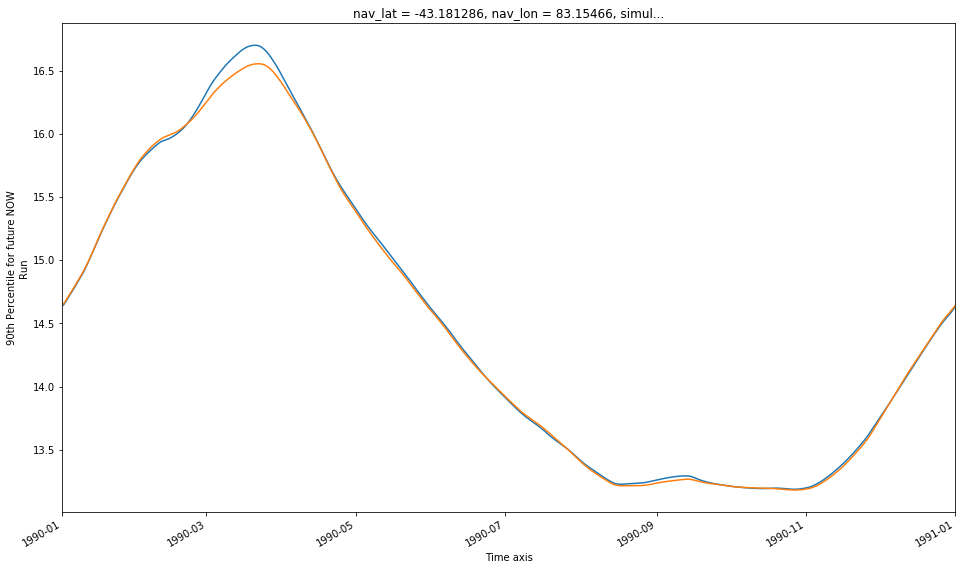

In [45]:
# This cell plots the 90th percentile and new MHW threshold for the future (to show the difference in the two approaches)
# and also plots the past Threshold.

fThresh.isel(x = 1, y = 1).plot()
fPerc.isel(x = 1, y = 1).plot();
xlim(726468, 726833);

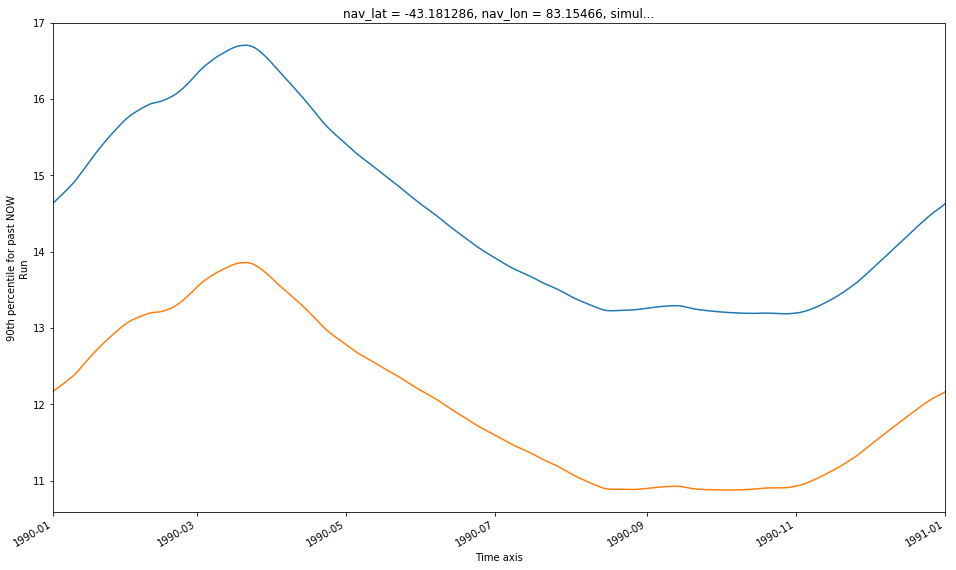

In [48]:
# This cell plots the past Threshold vs future Threshold.
fThresh.isel(x = 1, y = 1).plot()
pThresh.isel(x = 1, y = 1).plot();
xlim(726468, 726833);

In [31]:
fThresh.chunk({'x':289, 'y':431, 'time_counter':6940}).to_netcdf('/g/data1a/e14/rm6294/NOWMHW/futureThreshRep.nc')